In [37]:
library('ggplot2')
library('reshape2')

## Simulation results
Analysing the results from simulation comparing the performance of variable selection through naive GLMMLasso and with the addition of Selective Inference.

**Features of the data**
* n = 100, with 25 subjects with 4 observations each.
* p = 100, with varying number of non-zero coefficients, which take values in \{-1,-0.8,0.8,1\}.
* Random intercept, without other random effects.
* SNR $\in\{2,4\}$.
* $\lambda$ is fixed for both methods, without optimization.

In [10]:
df <- rbind(read.csv("simulation_results_SNR2.csv"), read.csv("simulation_results_SNR4.csv"))

In [64]:
df_sep <- data.frame(matrix(ncol = 6, nrow = 0))
colnames(df_sep) <- c('SNR','prop_relevant','TPR','FDR','num_sel','method')

for(i in 1:nrow(df)){
    df_sep[2*i-1,] <- c(df[i,c('SNR','prop_relevant','TPR_lasso','FDR_lasso','num_sel_lasso')],'Lasso')
    df_sep[2*i,] <- c(df[i,c('SNR','prop_relevant','TPR_selinf','FDR_selinf','num_sel_selinf')],'SelInf')
}

df_sep[,'prop_relevant'] <- as.factor(df_sep[,'prop_relevant'])
df_sep[,'SNR'] <- as.factor(df_sep[,'SNR'])

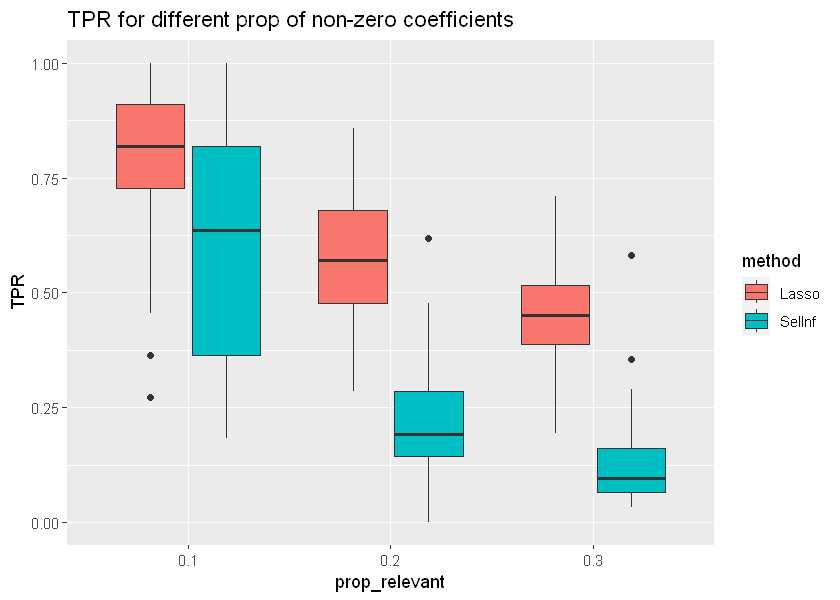

In [76]:
options(repr.plot.width=7, repr.plot.height =5) 
ggplot(df_sep, aes(x=prop_relevant, y=TPR, fill=method)) + 
    geom_boxplot() + ggtitle('TPR for different prop of non-zero coefficients')

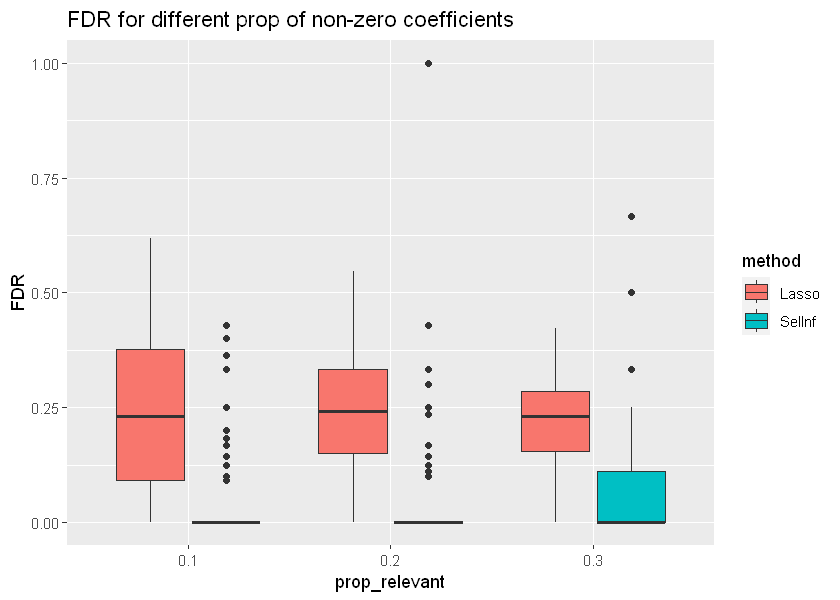

In [78]:
ggplot(df_sep, aes(x=prop_relevant, y=FDR, fill=method)) + 
    geom_boxplot() + ggtitle('FDR for different prop of non-zero coefficients')

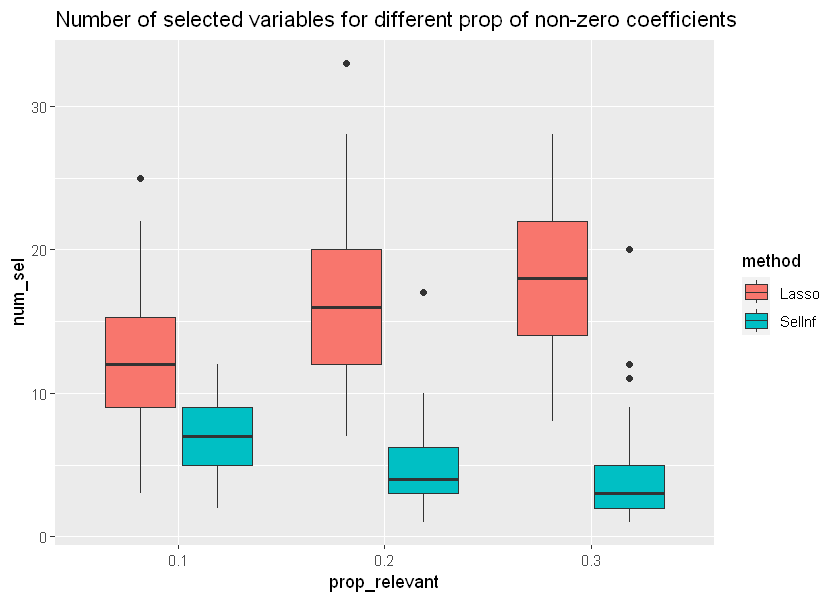

In [79]:
ggplot(df_sep, aes(x=prop_relevant, y=num_sel, fill=method)) + 
    geom_boxplot() + ggtitle('Number of selected variables for different prop of non-zero coefficients')

## Takeaways

* SNR seems to not really influence the results in this simulation.
* The SelInf method seems to select less variables as the number of non-zero coefficients rises.
* Using Naive GLMMLasso fails to control the FDR, but in this setting SelInf is way too conservative, with median FDR at 0, but very low TPR.
* FDR with SelInf also presents a lot of outliers, with values up to 1 in some cases.